In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# axes:
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.axis'] = 'both'
mpl.rcParams['axes.axisbelow'] = True

# figure:
mpl.rcParams['figure.figsize'] = [7.4, 4.8]
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['figure.dpi'] = 100

# fontsizes
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['legend.title_fontsize'] = 12
mpl.rcParams['axes.labelsize'] = 16

# save
mpl.rcParams['savefig.bbox'] = 'tight'

# cargo los archivos 
voltajes_prendido_sin_vidrio = pd.read_csv("Mediciones/datos histograma de alturas escala 2mV.csv")*1e3
voltajes_prendido = np.loadtxt('Mediciones/datos histograma 2mV 250 ns vidrio.txt')*1e3
voltajes_apagado= pd.read_csv("Mediciones/datos histograma de alturas laser apagado.csv")*1e3

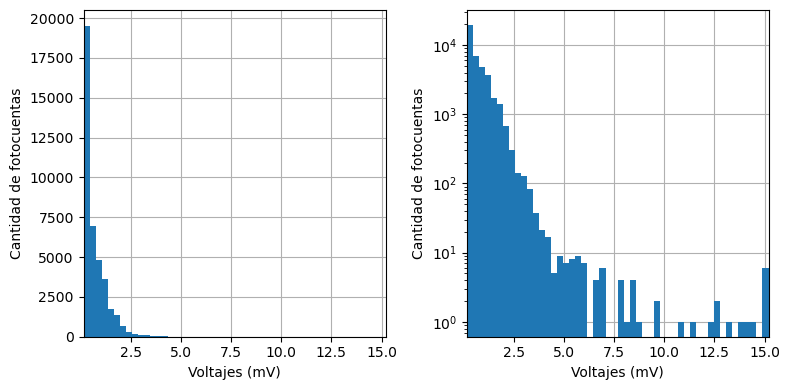

In [8]:
# histogramas de fotocuentas con el láser prendido sin el vidrio con y sin escala logaritmica

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.hist(voltajes_prendido_sin_vidrio, bins=50)
ax1.set_ylabel('Cantidad de fotocuentas')
ax1.set_xlabel('Voltajes (mV)')

ax2.hist(voltajes_prendido_sin_vidrio, bins=50)
ax2.set_ylabel('Cantidad de fotocuentas')
ax2.set_xlabel('Voltajes (mV)')
ax2.set_yscale('log')

# para guardarlos a la carpeta de mi compu
# plt.savefig('Gráficos/histograma de voltajes escala 2mV', dpi=150, format='png')

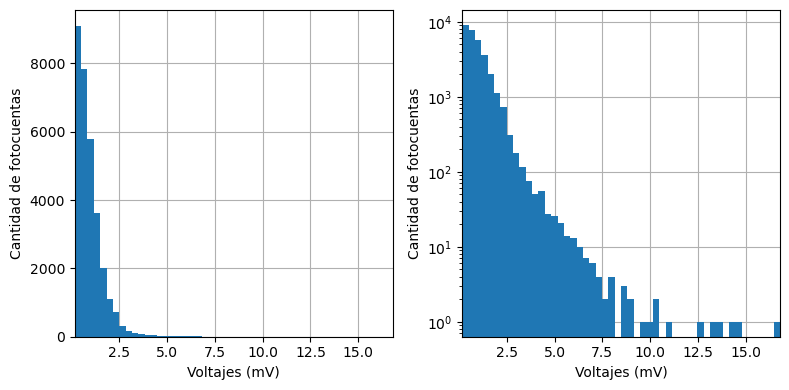

In [9]:
# histogramas de fotocuentas con el láser prendido con el vidrio con y sin escala logaritmica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.hist(voltajes_prendido, bins=50)
ax1.set_ylabel('Cantidad de fotocuentas')
ax1.set_xlabel('Voltajes (mV)')

ax2.hist(voltajes_prendido, bins=50)
ax2.set_ylabel('Cantidad de fotocuentas')
ax2.set_xlabel('Voltajes (mV)')
ax2.set_yscale('log')

# para guardarlos a la carpeta de mi compu
# plt.savefig('Gráficos/histograma laser con vidrio', dpi=150, format='png')

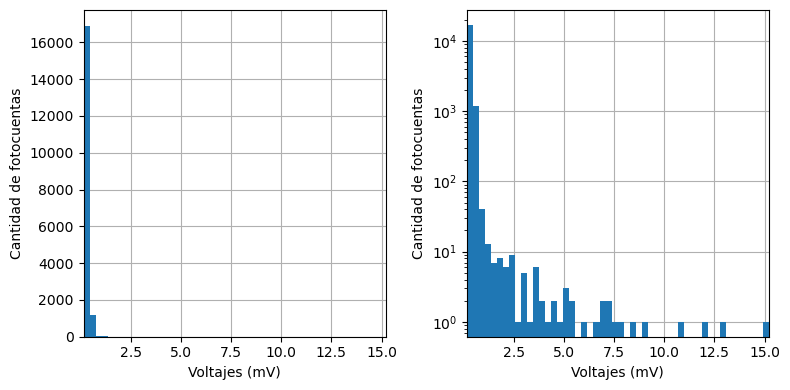

In [10]:
# histogramas de fotocuentas con el láser apagado con y sin escala logaritmica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

ax1.hist(voltajes_apagado, bins=50)
ax1.set_ylabel('Cantidad de fotocuentas')
ax1.set_xlabel('Voltajes (mV)')

ax2.hist(voltajes_apagado, bins=50)
ax2.set_ylabel('Cantidad de fotocuentas')
ax2.set_xlabel('Voltajes (mV)')
ax2.set_yscale('log')

# para guardarlos a la carpeta de mi compu
# plt.savefig('Gráficos/histograma laser apagado', dpi=150, format='png')

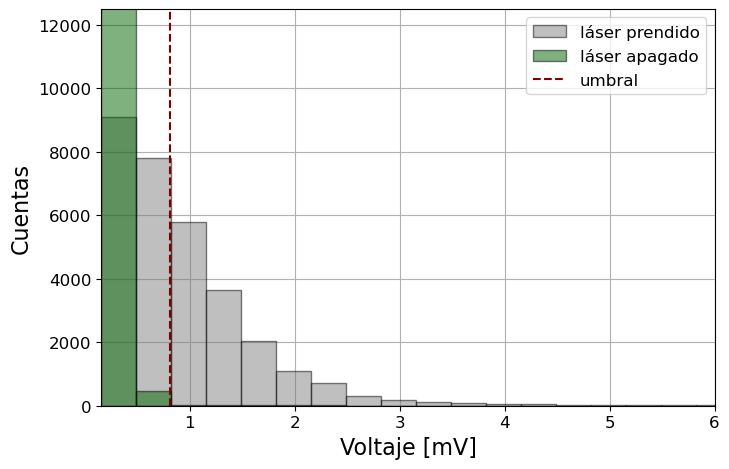

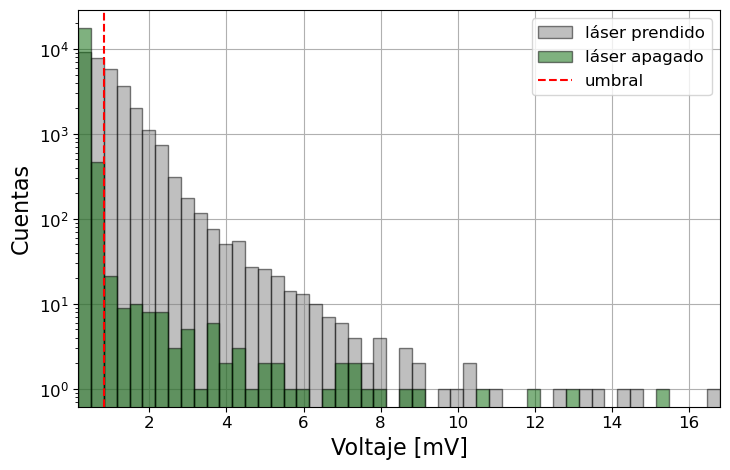

In [33]:
fig, ax1 = plt.subplots()

# n y bins tienen la cantidad de cuentas por bin y los bordes de los bins respectivamente (los bordes son los mismos para ambos, n no)
n_prendido, bins_prendido, patches_prendido = ax1.hist(voltajes_prendido, bins=50, label='láser prendido', alpha=0.5, color='gray', edgecolor='k')
n_apagado, bins_apagado, patches_apagadp = ax1.hist(voltajes_apagado, bins=bins_prendido, label='láser apagado', alpha=0.5, color='darkgreen', edgecolor='k')

ax1.set_ylabel('Cuentas')
ax1.set_xlabel('Voltaje [mV]')
ax1.axvline(0.8161073825503357, color='maroon', linestyle='--', label='umbral')
ax1.set_ylim(0, 12500)
ax1.set_xlim(bins_prendido[0], 6)
ax1.legend()
plt.savefig('Gráficos/histograma voltajes.pdf', format='pdf', dpi=150)

fig, ax2 = plt.subplots()

n_prendido, bins_prendido, patches_prendido = ax2.hist(voltajes_prendido, bins=50, label='láser prendido', alpha=0.5, color='gray', ec='k')
n_apagado, bins_apagado, patches_apagadp = ax2.hist(voltajes_apagado, bins=bins_prendido, label='láser apagado', alpha=0.5, color='darkgreen', ec='k')

ax2.set_ylabel('Cuentas')
ax2.set_xlabel('Voltaje [mV]')
ax2.set_yscale('log')
ax2.axvline(0.8161073825503357, color='r', linestyle='--', label='umbral')
ax2.legend()
plt.savefig('Gráficos/histograma voltajes log.pdf', format='pdf', dpi=150)
